In [1]:
%pylab inline
import matplotlib as mpl
mpl.rc('savefig',dpi = 150)
import os

Populating the interactive namespace from numpy and matplotlib


# Takagi: D and K-s.

1.10e-08:	D
4.35e-30:	ku
5.01e-31:	kd


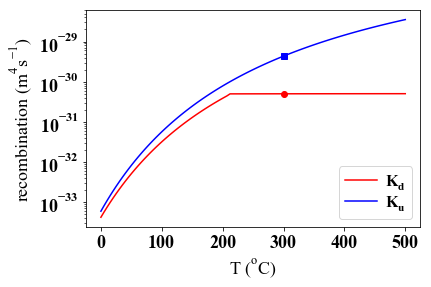

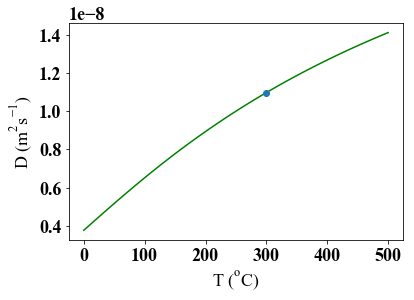

In [2]:
from scipy.constants import convert_temperature,eV,Boltzmann
k = Boltzmann/eV

def fkd(T):
    T = convert_temperature(T,'C','K')
    if T>483: return 5.13e-31*np.exp(-0.0012/(k*T))
    else: return 4.32e-27*np.exp(-0.38/(k*T))
def fku(T): 
    T = convert_temperature(T,'C','K')
    return 1.43e-26*np.exp(-0.4/(k*T))

def fD(T): 
    T = convert_temperature(T,'C','K')
    return 2.9e-8*np.exp(-0.048/(k*T))

x = np.linspace(0,500,100)
kd = [fkd(i) for i in x]
ku = [fku(i) for i in x]
D = [fD(i) for i in x]

font = {'family':'Times New Roman','weight':'heavy','size': 18}
plt.rc('font',**font)
plt.rcParams.update({'mathtext.default':  'regular' })

plot(x,kd,'r-',label = '$K_d$')
plot(x,ku,'b-',label = '$K_u$')
plot(300,fkd(300),'ro')
plot(300,fku(300),'bs')
yscale('log')
legend(numpoints=1,framealpha=.8,labelspacing=.1,columnspacing=.1,handletextpad=.5,fontsize = 16,loc = 4)
xlabel('T ($^oC$)')
ylabel('recombination ($m^{4}s^{-1}$)')
#sf = os.path.join(os.path.expanduser('~'),'Desktop','Stencils','kukd.png')
#plt.savefig(sf,dpi=300,bbox_inches = 'tight')
figure()
plot(x,D,'g-',label = 'D')
plot([300],[fD(300)],'o')
xlabel('T ($^oC$)')
ylabel('D ($m^{2}s^{-1}$)')
print '%.2e:\tD'%fD(300)
print '%.2e:\tku'%fku(300)
print '%.2e:\tkd'%fkd(300)

#sf = os.path.join(os.path.expanduser('~'),'Desktop','Stencils','D.png')
#plt.savefig(sf,dpi=300,bbox_inches = 'tight')

Concentration profile in the semi-infinit slab with constant concentration at the surface

[1.00000000e-04 3.59381366e-04 1.29154967e-03 4.64158883e-03
 1.66810054e-02 5.99484250e-02 2.15443469e-01 7.74263683e-01
 2.78255940e+00 1.00000000e+01]


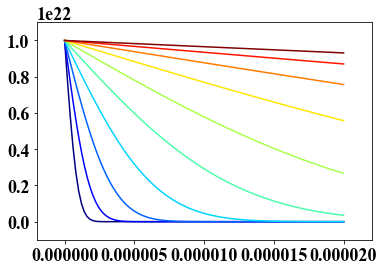

In [3]:
from scipy.special import erf,erfc
x = np.linspace(0,20e-6,100)
D = 2.7e-9
c0 = 1e22
times = np.logspace(-4,1,10)
print times
color_idx = np.linspace(0,1,len(times))
for i,t in enumerate(times):
    plot(x,c0*erfc(x/(2*np.sqrt(D*t))),color = plt.cm.jet(color_idx[i]))
margins(0.1)

In [4]:
L = 20e-6
dt = 1
Dh = L**2/(6*dt)
print Dh

6.66666666667e-11
